# Clustering

in this tutorial clustering will be explained


## content of the tutorial:

1. Introduction Kmeans
    * What is Kmeans clustering?
    * When can you apply it?
2. Step by step Kmeans
    * Import the data
    * Standardization
    * placing cluster points/centroids 
    * Assigning points to clusters
    * update centroid location
    * Assign points
    * repeat 
    * plot the endresult


### introduction

#### what is Kmeans clustering
Kmeans is a very much used algorithm because its very easy to implement and is very efficient computationally speaking. Those are the reasons that this algorithm is used so often. However there are also some problems and shortcomings like the algorithm struggles with detecting non spherical clusters. Because this algorithm looks for high similarity in the distance between datapoints the shorter this distance the more similar the points are. And the more likely it is that they belong to the same cluster.

#### when can you apply Kmeans
Kmeans clustering can be applied with a lot of different types of datasets,for example to see what interests customers have. Kmeans is also applied as a benchmark when testing other clustering methods to see if more advanced algorithms actually are an improvement.


### step by step Kmeans 


Here will follow a step by step tutorial where you can make a simple Kmeans program for a small dataset. Here we skip the normalization part of the Kmeans algorithm since you learned this in the pandas tutorial.

#### step 1
first of all we start by importing the libraries we will need, Pandas for the dataset, numpy for some mathamatical functions and matplotlib.pyplot for plotting the results we get.
Now do this in the cell below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Step 2
You will practice your skills on the following small dataset. It's small so you can see all the steps in the process. 
Run the next cell to get your data.

In [2]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 72, 70, 79, 68, 65],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 42, 45, 62, 55, 59]
})

#### Step 3 

now you pick the number of clusters you want. In this tutorial we start with 3 clusters that you have to place at random. To make sure it's random but you do not get different results every time you run the code we use a function of numpy called np.random.seed() this makes sure that you generate a random number but that this number does not change when running the code multiple times.
Complete the code in the next cell:


In [3]:
np.random.seed(200) # makes sure that a random number stays the same each time you run

k = 3
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

If you were succesfull you can plot your results and it should look like this:
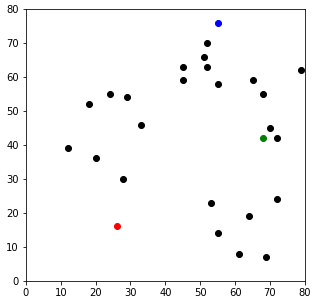  to make the plot complete the following code. hint, plot the datapoints as black and the centroids with color.

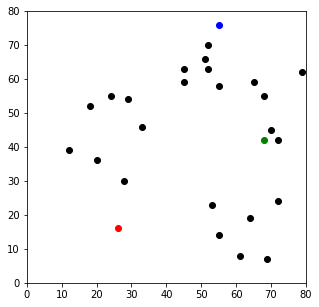

In [4]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b',4:'m'} # so you can see the centroids you just created and can assign this color to the other points
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


#### step 4 
now it is time to assign the datapoints to a cluster. you do this by calculating the distance from each point to the centroids and adding that information to the DataFrame df. 
Next you build a function called assignment, where you calculate the distance and after that is done you add 2 other columns one for the closest cluster and the other for the color that point should have. the color is purely to visualize the results and check if your code is correct. 


In [5]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids) 


A simple way to check if your new columns are added correctly is to print the head of the DataFrame, do this now to see if it worked. if it did you can plot the datapoints with their color to see how your program assigned each datapoint.
It should look like: 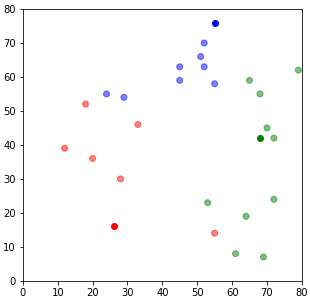

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


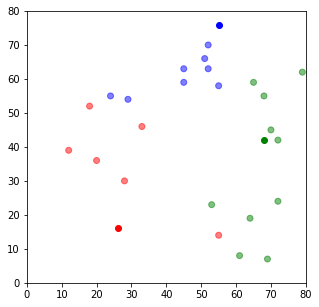

In [6]:
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5) # alpha is set to 0.5 to show the difference between a normal point and the cluster point 
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

#### Step 5

as you can see the clusters and centroids are not very good at this point everything is assigned but you can imagine that the red point in the bottom right corner should be green.
Now it is time to update the centroids that were chosen and placed at random. 
to do this build a funcion called update where you relocate the centroid to the middle of the cluster they belong to.


(0, 80)

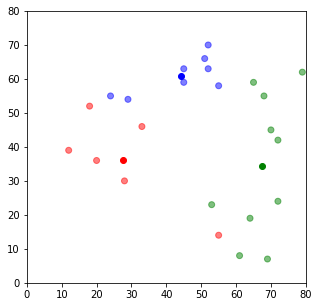

In [7]:
def update(k): #here you update the centroid location to the mean of all points that were in that cluster so you differentiate even more
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)


Now you updated the centroids you should plot them to see there movement and note that now the datapoints are not perfectly assigned anymore. 
repeat the process of steps 4 and 5 until nothing changes anymore and compare it to the sollution. 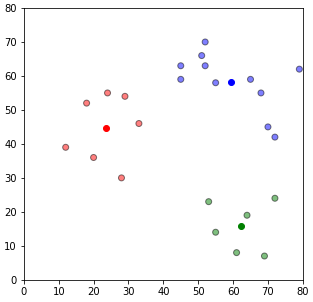

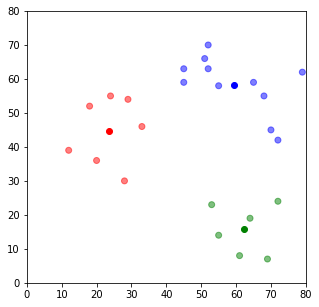

In [13]:
df = assignment(df,centroids)
centroids = update(centroids)
# this should be repeated until no visible change is detected (5x)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


#### step 6
This method is very time consuming so the next excersize is to build a program in spyder or in the cell below that does this all without you having to update en assign the points every time. You should use the code from the steps you already passed to build this program. the result should be precisely the same.

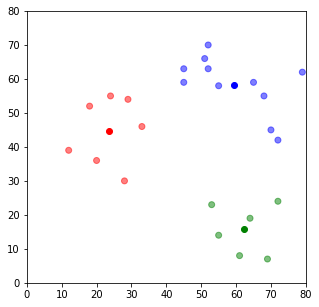

In [15]:
#full code:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#initialisation 
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 72, 70, 79, 68, 65],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 42, 45, 62, 55, 59]
})  # simple dataset to start of with later this should be replaced for the comumns we have in our big dataset

# this makes sure that the random numbers are the same every time you run it can be deleted when the dataset is found
np.random.seed(200) 

k = 3 #number of centroids
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

colmap = {1: 'r', 2: 'g', 3: 'b',4:'m'} # so you can see the centroids you just created and can assign this color to the other points

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2) euclidian distance 
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids) #assign it the first time

def update(k): #here you update the centroid location to the mean of all points that were in that cluster so you differentiate even more
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k


while True:
    closest_centroids = df['closest'].copy(deep=True)
    centrouds = update(centroids)
    df=assignment(df,centroids)
    if closest_centroids.equals( df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


